In [3]:
# import basic libraries
import yt
import pickle
import numpy as np
import matplotlib.pyplot as plt
from math import log, log10
from astropy import units as u

# import halo catalogue func
from yt.analysis_modules.halo_analysis.api import *

# load halo dataset
halos_ds = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres180.0.h5')

yt : [INFO     ] 2017-07-25 15:35:13,018 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-07-25 15:35:13,020 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-25 15:35:13,022 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-25 15:35:13,024 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-07-25 15:35:13,026 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-25 15:35:13,027 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-07-25 15:35:13,028 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-07-25 15:35:13,029 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-07-25 15:35:13,030 Parameters: hubble_constant           = 0.6933


In [12]:
import tempfile
import shutil
import os

# Create temporary directory for storing files
tmpdir = tempfile.mkdtemp()

In [13]:
# Instantiate a catalog using those two paramter files
hc = HaloCatalog(halos_ds=halos_ds, output_dir=os.path.join(tmpdir, 'halo_catalog'))
hc.load()

yt : [INFO     ] 2017-07-12 16:55:15,422 Allocating for 8.970e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-07-12 16:55:15,439 Identified 3.065e+03 octs


In [14]:
# specify boundaries of zoom-in box
# scaling factor multiplied by info from text file 
# units in cm
xmin = 2.22535525e+25*0.39319589 * u.cm
ymin = 2.22535525e+25*0.42984636 * u.cm
zmin = 2.22535525e+25*0.41706725 * u.cm

xmax = 2.22535525e+25*0.56298484 * u.cm
ymax = 2.22535525e+25*0.55089246 * u.cm
zmax = 2.22535525e+25*0.56698254 * u.cm

In [22]:
# load halo dataset
halos_ds1 = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres140.0.h5')
halos_ds2 = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres160.0.h5')
halos_ds3 = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres180.0.h5')

# Instantiate a catalog using those two paramter files
hc1 = HaloCatalog(halos_ds=halos_ds1, output_dir=os.path.join(tmpdir, 'halo_catalog1'))
hc1.load()
hc2 = HaloCatalog(halos_ds=halos_ds2, output_dir=os.path.join(tmpdir, 'halo_catalog2'))
hc2.load()
hc3 = HaloCatalog(halos_ds=halos_ds3, output_dir=os.path.join(tmpdir, 'halo_catalog3'))
hc3.load()

# find masses of halos
masslist1 = []
masslist2 = []
masslist3 = []

for halo in hc1.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist1.append(mass.value)

for halo in hc2.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist2.append(mass.value)

for halo in hc3.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist3.append(mass.value)

yt : [INFO     ] 2017-07-12 17:10:03,609 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-07-12 17:10:03,611 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-12 17:10:03,614 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-12 17:10:03,616 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-07-12 17:10:03,618 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-12 17:10:03,620 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-07-12 17:10:03,622 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-07-12 17:10:03,623 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-07-12 17:10:03,625 Parameters: hubble_constant           = 0.6933
yt : [INFO     ] 2017-07-12 17:10:03,696 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-07-12 17:10:03,698 Par

In [24]:
masslist1 = np.array(masslist1)
masslist2 = np.array(masslist2)
masslist3 = np.array(masslist3)

In [25]:
bins = np.geomspace(start=1e6, stop=1e11, num=50)

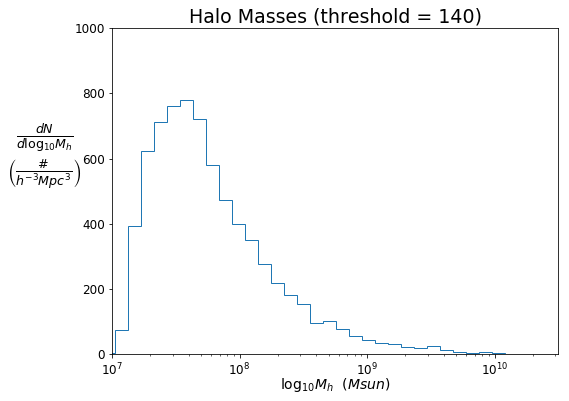

In [28]:
# create histogram
plt.figure(figsize=(8,6))
plt.hist(masslist1, bins, histtype='step', fill = False)
plt.title("Halo Masses (threshold = 140)", size = 19)
plt.axis([1e7, 10**10.5, 0, 1000])


# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
plt.xlabel(xlab, size = 14, labelpad= -2)
plt.ylabel(ylab, rotation = 0, size = 18, labelpad= 30)

# create axis ticks 
plt.xscale('log')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

#show and save
plt.show()

#plt.savefig('./LG4_2048_40pc/rd0070/graph2.png', dpi = 300)

In [31]:
log_mass1 = np.log(masslist1) / log(10)
density1, bin_edges1 = np.histogram(log_mass1, bins= np.linspace(7, 10, 30))
log_density1 = np.log(density1) / log(10)

log_mass2 = np.log(masslist2) / log(10)
density2, bin_edges2 = np.histogram(log_mass2, bins= np.linspace(7, 10, 30))
log_density2 = np.log(density2) / log(10)

log_mass3 = np.log(masslist3) / log(10)
density3, bin_edges3 = np.histogram(log_mass3, bins= np.linspace(7, 10, 30))
log_density3 = np.log(density3) / log(10)

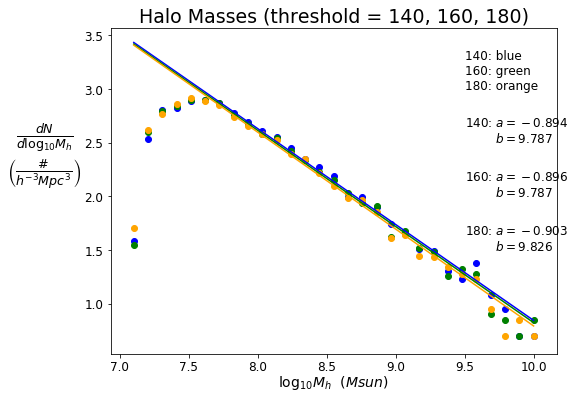

In [43]:
# specify figure size
plt.figure(figsize=(8,6))

#determine lines of best fit
bin_edges_fit1 = bin_edges1[6:-4]
log_density_fit1 = log_density1[5:-4]
par1 = np.polyfit(bin_edges_fit1, log_density_fit1, 1, full=True)
slope1, intercept1 = par1[0][0], par1[0][1]

bin_edges_fit2 = bin_edges2[6:-4]
log_density_fit2 = log_density2[5:-4]
par2 = np.polyfit(bin_edges_fit2, log_density_fit2, 1, full=True)
slope2, intercept2 = par2[0][0], par2[0][1]

bin_edges_fit3 = bin_edges3[6:-4]
log_density_fit3 = log_density3[5:-4]
par3 = np.polyfit(bin_edges_fit3, log_density_fit3, 1, full=True)
slope3, intercept3 = par3[0][0], par3[0][1]

# plot data and lines
bin_edges_red1 = bin_edges1[1::]
plt.scatter(bin_edges_red1, log_density1, color = 'blue')
plt.plot(bin_edges_red1, slope1 * bin_edges_red1 + intercept1, color = 'blue')

bin_edges_red2 = bin_edges2[1::]
plt.scatter(bin_edges_red2, log_density2, color = 'green')
plt.plot(bin_edges_red2, slope2 * bin_edges_red2 + intercept2, color = 'green')

bin_edges_red3 = bin_edges3[1::]
plt.scatter(bin_edges_red3, log_density3, color = 'orange')
plt.plot(bin_edges_red3, slope3 * bin_edges_red3 + intercept3, color = 'orange')

plt.title("Halo Masses (threshold = 140, 160, 180)", size = 19)

# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
plt.xlabel(xlab, size = 14, labelpad= 0)
plt.ylabel(ylab, rotation = 0, size = 18, labelpad= 40)

# create axis ticks 
plt.yscale('linear')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

# add slope and intercept
annotation1 = "140: $a = {:1.3f}$ \n        $b = {:1.3f}$".format(slope1, intercept1)
annotation2 = "160: $a = {:1.3f}$ \n        $b = {:1.3f}$".format(slope2, intercept2)
annotation3 = "180: $a = {:1.3f}$ \n        $b = {:1.3f}$".format(slope3, intercept3)
legend = "140: blue \n160: green \n180: orange"
plt.text(9.5, 1.5, annotation3, size = 12)
plt.text(9.5, 2.0, annotation2, size = 12)
plt.text(9.5, 2.5, annotation1, size = 12)
plt.text(9.5, 3.0, legend, size = 12)

#show and save
plt.show()


In [ ]:
#--find ratio of stellar mass to halo mass
ratiolist = []

# dataset
ds = yt.load('~/../../tigress/cen/LG4_2048_40pc/RD0070/redshift0070')

for halo in hc.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    halo_mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        # create a sphere data object with halo position and radius
        radius = halo.quantities.get('virial_radius') * u.cm
        sp = ds.sphere([x.value/2.22535525e+25, y.value/2.22535525e+25, z.value/2.22535525e+25],
                        (radius.value, 'cm'))
        
        

In [45]:
# dataset
ds = yt.load('~/../../tigress/cen/LG4_2048_40pc/RD0070/redshift0070')

halo = hc.halo_list[-1]
# find coord and mass of halo
x = halo.quantities.get('particle_position_x') * u.cm
y = halo.quantities.get('particle_position_y') * u.cm
z = halo.quantities.get('particle_position_z') * u.cm
halo_mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun

# find stellar mass
radius = halo.quantities.get('virial_radius') * u.cm
sp = ds.sphere([x.value/2.22535525e+25, y.value/2.22535525e+25, z.value/2.22535525e+25],
                (radius.value, 'cm'))

# from below (just for test purposes)
stellar_mass = sp.quantities.total_mass() * u.g
stellar_mass = stellar_mass.to('Msun')
ratio = (stellar_mass) / halo_mass 
ratiolist.append(ratio)


yt : [INFO     ] 2017-07-13 16:06:39,370 Parameters: current_time              = 158.01757996843
yt : [INFO     ] 2017-07-13 16:06:39,371 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2017-07-13 16:06:39,373 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-13 16:06:39,374 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-07-13 16:06:39,375 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-13 16:06:39,376 Parameters: current_redshift          = 4.9999999832278
yt : [INFO     ] 2017-07-13 16:06:39,377 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-07-13 16:06:39,377 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-07-13 16:06:39,378 Parameters: hubble_constant           = 0.6933
Parsing Hierarchy : 100%|██████████| 44216/44216 [00:03<00:00, 14117.43it/s]
yt : [INFO     ] 2017-07-13 16:06:45,245 Gathering a field list (this may take a moment.)


NameError: name 'ratiolist' is not defined

In [ ]:
dd = ds.all_data()
ds.field_list

In [617]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'initial_mass'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_positio

In [622]:
print(ds.field_info["gas", "averaged_density"].get_source())

    def _averaged_field(field, data):
        nx, ny, nz = data[(ftype, basename)].shape
        new_field = data.ds.arr(np.zeros((nx-2, ny-2, nz-2), dtype=np.float64),
                                (just_one(data[(ftype, basename)]) *
                                 just_one(data[(ftype, weight)])).units)
        weight_field = data.ds.arr(np.zeros((nx-2, ny-2, nz-2),
                                            dtype=np.float64),
                                   data[(ftype, weight)].units)
        i_i, j_i, k_i = np.mgrid[0:3, 0:3, 0:3]

        for i, j, k in zip(i_i.ravel(), j_i.ravel(), k_i.ravel()):
            sl = [slice(i, nx-(2-i)), slice(j, ny-(2-j)), slice(k, nz-(2-k))]
            new_field += data[(ftype, basename)][sl] * data[(ftype, weight)][sl]
            weight_field += data[(ftype, weight)][sl]

        # Now some fancy footwork
        new_field2 = data.ds.arr(np.zeros((nx, ny, nz)), 
                                 data[(ftype, basename)].units)
        new_

In [613]:
DMdensity = sp.quantities.weighted_average_quantity(('enzo', 'Dark_Matter_Density'), 'ones').in_units('g/(cm**3)') * u.g / (u.cm ** 3)
volume = (4/3) * math.pi * (radius ** 3)
DM = DMdensity * volume
halo_mass / DM.to('Msun')

<Quantity 0.9100541492784664>

In [2]:
import pickle

In [182]:
# ignore LG4 since not all are found

# load newly calculated python halo lists
with open('./LG4_2048_40pc/rd0050/calc_list_3000', 'rb') as infile:
    calc_list4_0050 = pickle.load(infile)
with open('./LG35_2048_40pc/rd0050/calc_list_3000', 'rb') as infile:
    calc_list35_0050 = pickle.load(infile)
with open('./LG38_2048_40pc/rd0050/calc_list_3000', 'rb') as infile:
    calc_list38_0050 = pickle.load(infile)
with open('./LG76_2048_40pc/rd0050/calc_list_3000', 'rb') as infile:
    calc_list76_0050 = pickle.load(infile)
with open('./LG89_2048_40pc/rd0050/calc_list_3000', 'rb') as infile:
    calc_list89_0050 = pickle.load(infile)

In [195]:
# create master list
master_calc0110 = []
for halo in calc_list4_0110:
    halo[1] = 4 # replace old index with run index
    master_calc0110.append(halo)
for halo in calc_list35_0110:
    halo[1] = 35 # replace old index with run index
    master_calc0110.append(halo)
for halo in calc_list38_0110:
    halo[1] = 38 # replace old index with run index
    master_calc0110.append(halo)
for halo in calc_list76_0110:
    halo[1] = 76 # replace old index with run index
    master_calc0110.append(halo)
for halo in calc_list89_0110:
    halo[1] = 89 # replace old index with run index
    master_calc0110.append(halo)

In [196]:
len(master_calc0110)

6775

In [197]:
# store master calc list
with open('./master_calc0110', 'wb') as outfile:
    pickle.dump(master_calc0110, outfile)

In [198]:
master_calc0110 == master_calc0030

False

In [190]:
master_calc0050

[[9,
  4,
  <Quantity 2833.8338781096872 kpc>,
  <Quantity 2847.360286935479 kpc>,
  <Quantity 3398.9452977359992 kpc>,
  <Quantity 13332562365.04733 solMass>,
  <Quantity 10412668287.097445 solMass>,
  <Quantity 10.624806536845432 kpc>,
  <Quantity 11.420886334582518 kpc>,
  -1,
  <Quantity 1444938410.3949456 solMass>,
  <Quantity 550849081.7732359 solMass>,
  <Quantity 5597934792237517.0 s>,
  6.102889509381882,
  <Quantity 2.2432655518432605 kpc>,
  <Quantity 1.6624083364325604e+26 g / s>],
 [10,
  4,
  <Quantity 2991.4770082656387 kpc>,
  <Quantity 2911.270546477284 kpc>,
  <Quantity 2925.6250955493033 kpc>,
  <Quantity 9774756243.819807 solMass>,
  <Quantity 8627319055.978281 solMass>,
  <Quantity 9.580432932566806 kpc>,
  <Quantity 13.079320134091464 kpc>,
  -1,
  <Quantity 1021492536.7557428 solMass>,
  <Quantity 495036351.7226948 solMass>,
  <Quantity 5543128077507071.0 s>,
  2.0606118258329995,
  <Quantity 0.5143591366712165 kpc>,
  <Quantity 1.409409177393535e+26 g / s>],
 [1

In [168]:
calc_list4_0030

[[2,
  6174,
  <Quantity 2627.5477718091106 kpc>,
  <Quantity 2544.1446953630893 kpc>,
  <Quantity 2566.9740712620464 kpc>,
  <Quantity 9060402645.837389 solMass>,
  <Quantity 8196059175.637566 solMass>,
  <Quantity 8.179926407820114 kpc>,
  <Quantity 12.047283394153846 kpc>,
  -1,
  <Quantity 1087224856.5641356 solMass>,
  <Quantity 179782332.00519875 solMass>,
  <Quantity 5095953707694528.0 s>,
  0.9926139823748812,
  <Quantity 0.6091408165211215 kpc>,
  <Quantity 5.409627718652216e+25 g / s>],
 [4,
  6173,
  <Quantity 2486.6782986976655 kpc>,
  <Quantity 2492.584062611104 kpc>,
  <Quantity 2981.286788305112 kpc>,
  <Quantity 7849008048.218473 solMass>,
  <Quantity 6300394697.621254 solMass>,
  <Quantity 7.797795148079457 kpc>,
  <Quantity 13.030727461646416 kpc>,
  -1,
  <Quantity 1133655153.3998017 solMass>,
  <Quantity 210727364.1386518 solMass>,
  <Quantity 5753502563457781.0 s>,
  4.089688143275694,
  <Quantity 2.0409231219985373 kpc>,
  <Quantity 8.08990167090576e+25 g / s>],
 

In [207]:
list_string0110 = []
for halo in master_calc0110:
    string = ""
    
    # get params
    index = halo[0]
    runindex = halo[1]
    x = halo[2]
    y = halo[3]
    z = halo[4]
    mass = halo[5]
    radius = halo[7]
    isSat = halo[9]
    gasmass = halo[10]
    stelmass = halo[11]
    aveage = halo[12]
    prox = halo[13]
    stel_rad = halo[14]
    formrate = halo[15]
    
#     # check if satellite
#     if isSat < 0:
    gasmass = check_units(gasmass, u.Msun)
    stelmass = check_units(stelmass, u.Msun)
    aveage = check_units(aveage, u.s)
    stel_rad = check_units(stel_rad, u.kpc)
    formrate = check_units(formrate, u.Msun/u.Myr)
    
    # check if they have units
    gasmass = check_units(gasmass, u.Msun)
    stelmass = check_units(stelmass, u.Msun)
    aveage = check_units(aveage, u.s)
    stel_rad = check_units(stel_rad, u.kpc)
    
    # add params to string
    string += str(index) + ' '
    string += str(runindex) + ' '
    string += str(x.to('kpc').value) + ' '
    string += str(y.to('kpc').value) + ' '
    string += str(z.to('kpc').value) + ' '
    string += str(mass.to('Msun').value) + ' '
    string += str(radius.to('kpc').value) + ' '
    string += str(isSat) + ' '
    string += str(gasmass.to('Msun').value) + ' '
    string += str(stelmass.to('Msun').value) + ' '
    string += str(aveage.to('Myr').value) + ' '
    string += str(prox) + ' '
    string += str(stel_rad.to('kpc').value) + ' '
    string += str(formrate.to('Msun/Myr').value) + ' '
    
    # append halo string and new line to list
    list_string0110.append(string)
    list_string0110.append('\n')

all_string0110 = ''.join(list_string0110)

In [208]:
with open('../data/halos0110', 'w') as outfile:
    outfile.write(all_string0110)

In [173]:
count = 0
for halo in master_calc0030:
    index = halo[0]
    isSat = halo[9]
    if isSat >= 0:
        print(index)
        count += 1
print(count)

38
71
1053
1267
1804
2363
2605
2663
2795
2823
4
7
10
30
32
269
370
819
885
1006
1140
1213
1265
1354
1399
1511
1841
1843
2004
2036
2047
2104
2203
2282
2378
2582
2589
2592
2635
2636
2684
2806
2
3
6
8
12
14
24
29
35
39
44
155
313
317
359
387
398
501
507
515
522
589
605
641
652
668
691
789
808
857
871
887
1012
1067
1151
1152
1273
1286
1301
1327
1343
1398
1443
1532
1599
1641
1661
1738
1851
1929
1957
1965
2142
2192
2219
2315
2396
2475
2550
2565
2582
2691
2759
2834
2872
2875
2891
4
11
531
1453
1739
1896
1972
1981
2081
2319
2336
2403
2482
2597
2748
2820
2
3
6
8
12
14
24
29
35
39
44
155
313
317
359
387
398
501
507
515
522
589
605
641
652
668
691
789
808
857
871
887
1012
1067
1151
1152
1273
1286
1301
1327
1343
1398
1443
1532
1599
1641
1661
1738
1851
1929
1957
1965
2142
2192
2219
2315
2396
2475
2550
2565
2582
2691
2759
2834
2872
2875
2891
192


In [164]:
print(all_string0030)

2 2627.5477718091106 2544.1446953630893 2566.9740712620464 9060402645.837389 8.179926407820114 -1 1087224856.5641356 179782332.00519875 161.48102858565062 0.9926139823748812 0.6091408165211215 858251.8108397726 
4 2486.6782986976655 2492.584062611104 2981.286788305112 7849008048.218473 7.797795148079457 -1 1133655153.3998017 210727364.1386518 182.31749446909083 4.089688143275694 2.0409231219985373 1283484.394800541 
5 2339.2488708306832 2894.820385493461 2613.669782606675 7399207108.754084 7.64590019969148 -1 1028903189.0830644 131509292.10223362 114.6464034994648 1.1000793696865 2.5147696382361002 831351.38970031 
6 2516.157286172569 2586.491122317635 3074.34527172921 6012712815.028287 7.13494096564127 -1 1003398857.8285722 77881194.8138912 59.01005236638531 3.5479106682922166 1.382126928857632 1183570.474600386 
7 2550.493535401568 2529.047038584477 3018.5133828979656 5308698775.584763 6.844834074730685 -1 903427451.1354253 215504083.18244925 174.23699221699093 8.378233443774095 0.29

In [153]:
def check_units(item, units):
    try:
        if item.value is None:
            pass
        else:
            return item
    except AttributeError:
        return item * units